In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from tqdm import tqdm
from transformer_lens import utils

from sprint.loading import load_all
from sprint.vars import BATCH_SIZE

/opt/conda/envs/sprint/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model, data, sae = load_all()

Loaded pretrained model gelu-1l into HookedTransformer
Moving model to device:  cuda
Changing model dtype to torch.float16
Model device: cuda:0
Tokens shape: torch.Size([215402, 128]), dtype: torch.int64, device: cuda:0
{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}
Encoder device: cuda:0


In [5]:
token = model.tokenizer.encode("'t")
token

[625]

In [6]:
post = utils.get_act_name("post", 0)
out, cache = model.run_with_cache(["'t"], names_filter=[post])
acts = cache[post]

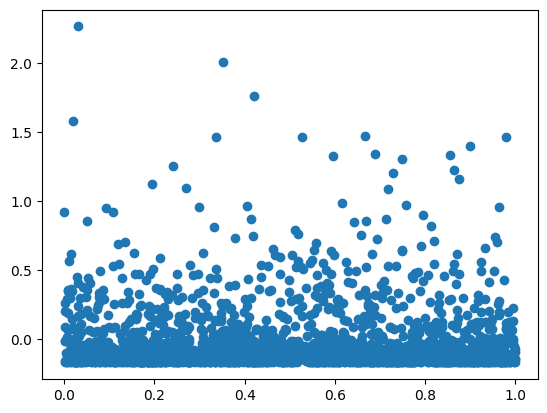

In [7]:
plt.scatter(np.random.rand(acts.shape[2]), acts[0][1].detach().cpu().numpy())

In [8]:
(acts[0][1] != 0).sum().item() / acts.shape[2]

0.9990234375

(array([ 2.,  1.,  1.,  0.,  0.,  2.,  2.,  2.,  1.,  0.,  1.,  3.,  2.,
         3.,  2.,  4.,  3.,  3.,  5.,  3.,  0.,  6.,  4.,  9.,  5., 12.,
         8.,  5.,  7., 10., 18., 10., 16.,  7.,  6.,  5., 18., 18., 15.,
         8., 16., 12., 17., 21., 16., 19., 15., 16., 11., 12., 15., 16.,
        16., 13.,  6.,  6.,  5.,  3.,  5.,  8.,  5.,  9.,  3.,  3.,  0.,
         2.,  0.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.57128906, -0.55712891, -0.54345703, -0.52929688, -0.51513672,
        -0.50097656, -0.48706055, -0.47314453, -0.45898438, -0.44506836,
        -0.4309082 , -0.41699219, -0.40283203, -0.38891602, -0.37475586,
        -0.36083984, -0.34667969, -0.33276367, -0.31860352, -0.3046875 ,
        -0.29052734, -0.27661133, -0.26245117, -0.24853516, -0.23449707,
        -0.22045898, -0.2064209 , -0.19238281, -0.17834473, -0.164306

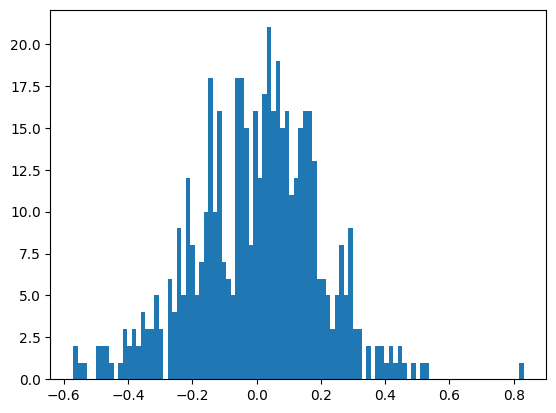

In [9]:
plt.hist((sae.W_enc[:, 10996] @ model.blocks[0].mlp.W_out).flatten().detach().cpu().numpy(), bins=100)

In [10]:
torch.allclose(model.blocks[0].mlp.W_out, model.W_out)

True

In [11]:
sae.W_enc.shape

torch.Size([2048, 16384])

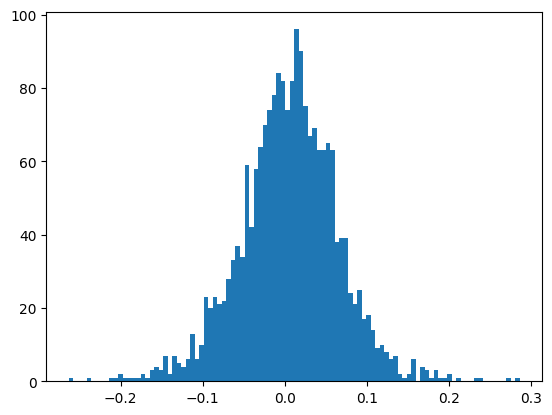

1.0


In [12]:
plt.hist(sae.W_enc[:, 10996].detach().cpu().numpy(), bins=100)
plt.show()

print((sae.W_enc[:, 10996] != 0).sum().item() / sae.W_enc.shape[0])

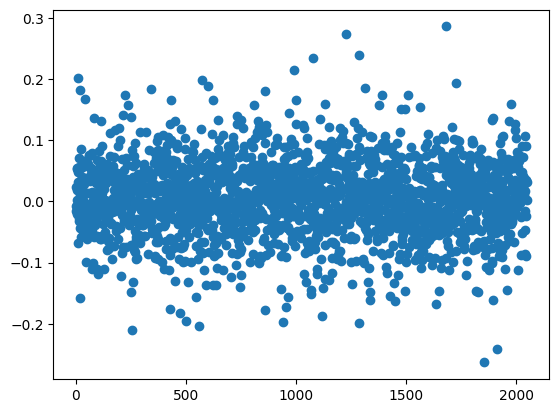

In [13]:
plt.scatter(np.arange(sae.W_enc.shape[0]), sae.W_enc[:, 10996].detach().cpu().numpy())
plt.show()

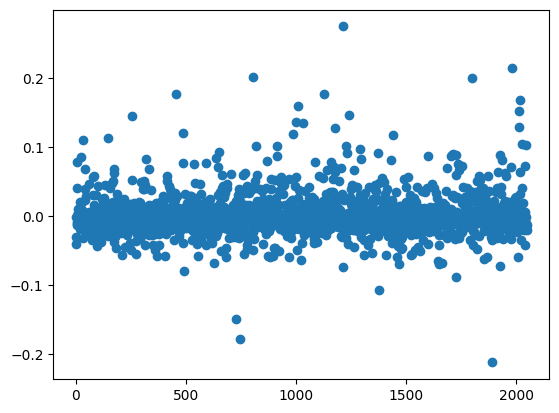

In [14]:
plt.scatter(np.arange(sae.W_dec.shape[1]), sae.W_dec[10996].detach().cpu().numpy())
